# Modifying only part of a picture

This recipe shows how to use *submat* to create a region of interest, or commonly called ROI, that is only part of the main picture. 

A submat shares the same underlying pixels as the original picture, thus any mofication on the submat will also modify the original picture.

So why would you want to use a submat then ? 
The main reason is that it is easier to work with. 

In [1]:
(ns homeless-crater
  (:require
    [opencv4.core :refer :all]
    [opencv4.colors.rgb :as rgb]
    [opencv4.utils :as u]))

nil

## blur only part of the picture

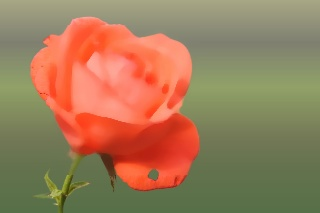

In [2]:
(def rose
  (-> 
    "resources/matching/rose_flower.jpg" 
    imread 
    (u/resize-by 0.25)))

(def rose-1 
  (-> rose clone))
(def sub 
  (submat rose-1 (new-rect 50 25 150 150)))
(median-blur! sub 9)

(u/>>> rose-1)

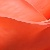

In [3]:
(def sub2 
  (submat (-> rose clone) (new-rect 100 100 50 50)))

(u/>>> sub2)

## turn picture to grey except part

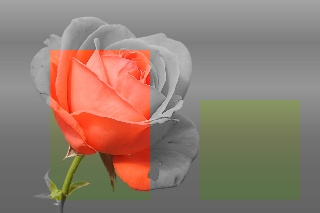

In [4]:

(def rose-2 (-> rose clone))

(def gray
   (-> 
     rose 
     clone 
     (cvt-color! COLOR_BGR2GRAY) 
     (cvt-color! COLOR_GRAY2BGR)))

(def rects [
  (new-rect 50 50 100 150)
  (new-rect 200 100 100 100)])

(doseq [ r rects ]
  (let [ s (submat rose-2 r ) mask (new-mat)]
    (copy-to s (submat gray r) mask)))

(u/>>> gray)
